In [7]:
import numpy as np
import pandas as pd
import time
from amc_parser import *
from T3Dviewer import *
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, tan, cos, pi
import cv2
import matplotlib.image as mpimg

%matplotlib notebook
%autosave 120

def eulerAnglesToRotationMatrix(theta) :
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         cos(theta[0]), -sin(theta[0]) ],
                    [0,         sin(theta[0]), cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[cos(theta[1]),    0,      sin(theta[1])  ],
                    [0,                1,      0                   ],
                    [sin(theta[1]),   0,      cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[cos(theta[2]),    -sin(theta[2]),    0],
                    [sin(theta[2]),    cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R


Autosaving every 120 seconds


root:
    Order - Values [TX TY TZ : Translation, RX RY RZ: rotation] Channels of motion on VICON
    
Data information:
    root:
    order, axis, position, orientation
    bonedata:
    id, name, direction, length, axis, dof, limits (?), parent, child

end goal:
get table of global position for each part ([x,y,z]-data)(bone-column)(time-row)

In [3]:
#abs_path = os.getcwd()
asf_path = 'data\\01.asf'
amc_path = 'data\\01_01.amc'
joints = parse_asf(asf_path)
motions = parse_amc(amc_path)


In [8]:
# a=list(joints.keys())
# MCapVal = pd.DataFrame(data=None,columns=a)

#for j in joints.values():
    #j.name
    #(j.__dict__.keys())
    

In [34]:
#motion is a list -> dict
#motions[0]['root']
#np.reshape(np.array(motions[0]['root'][:3]), [3, 1])

[9.37216, 17.8693, -17.3198, -2.01677, -7.59696, -3.23164]

In [7]:
#joints['root'].set_motion(motions[1])
#loopList = range(len(motions))


In [4]:
a=[]
b=list(joints.keys())
MCapVal = pd.DataFrame(data=None,columns=b)
loopList = range(len(motions))

for i in loopList[1:]:
    joints['root'].set_motion(motions[i])
    for j in joints.values():
        a.append(j.coordinate)
        #print(j.name)
        #MCapVal[j.name].append(j.coordinate)
    #print(a)
    MCapVal.loc[len(MCapVal), :] = a
    a=[]
    #break
#MCapVal
#MCapVal.append(a)

    root lhipjoint rhipjoint lowerback
    lhipjoint lfemur
    lfemur ltibia
    ltibia lfoot
    lfoot ltoes
    rhipjoint rfemur
    rfemur rtibia
    rtibia rfoot
    rfoot rtoes
    lowerback upperback
    upperback thorax
    thorax lowerneck lclavicle rclavicle
    lowerneck upperneck
    upperneck head
    lclavicle lhumerus
    lhumerus lradius
    lradius lwrist
    lwrist lhand lthumb
    lhand lfingers
    rclavicle rhumerus
    rhumerus rradius
    rradius rwrist
    rwrist rhand rthumb
    rhand rfingers
    
Order:
0:1,6,11
1:2
2:3
3:4
4:5
6:7
7:8
8:9
9:10
11:12
12:13
13:14,17,24
14:15
15:16
17:18
18:19
19:20
20:21,23
21:22
24:25
25:26
26:27
27:28,30
28:29
Parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
Child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

In [65]:
parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

#MCapVal.iloc[0,:] all in this row
#list(range(len(MCapVal.columns.values)))
#pd.DataFrame(MCapVal.columns.values)

#x,y,z = [MCapVal.iloc[0,0][j] for j in range(3)]
#print(x,y,z,MCapVal.iloc[0,0])
#MCapVal.iloc[0,0][0]
#[MCapVal.iloc[0,parent[0]][0][0], MCapVal.iloc[0,child[0]][0][0]]

ax = plt.gca(projection="3d")

for i in range(len(parent)):
    x,y,z = [[MCapVal.iloc[500,parent[i]][j][0], 
              MCapVal.iloc[500,child[i]][j][0]] for j in range(3)] 
    ax.scatter(x,y,z,c='r', s=100)
    ax.plot(x,y,z, c='r')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=100,azim=-70)
plt.show()
#plt.close()
#len(a)
#a
#MCapVal
#joints['ltibia'].__dict__

C:\Users\TheDave\Anaconda3\lib\site-packages\matplotlib\pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\TheDave\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Current Location

In [77]:

#ax = plt.gca(projection="3d")
#ax.plot([x[0],x[1]],[y[0],y[1]],[z[0],z[1]], 'ro')

# import cv2
# import matplotlib.image as mpimg

vidcap=cv2.VideoCapture('data/01_01.mpg')

frame_no=550/750
vidcap.set(1,frame_no)

success,image = vidcap.read()
plt.imshow(image)
plt.show()
#cv2.imshow('frame',image)
# cv2.imwrite("frame00.jpg",image)
# length = int(vidcap.get(cv2.CAP_PROP_FPS))
# print(length)

#plt.show()
#a=joints['head'].coordinate

751 frames in mpg file
<br>
29 frames per second
<br>
iamge size (360,240)
***
2750 frames in VICON amc file
<br>
more frames in vicon then in mpg
<br>
2750/750* =  11/3
<br>*(round that shit)
<br> 550 Vicon Frame = 150 frame

In [11]:
# a=MCapVal.iloc[0,0]
# a=np.expand_dims(a,axis=0)
# b=np.random.random((1,3,1))

#a=np.array([9.3,17.8,-17.3])
# print(a)
# print(MCapVal.iloc[0,0])
#np.array([9,17,-17])
# print(a)
#print(a[0],MCapVal.iloc[0,0])

# fx=fy=1.0
# cx = cy = 0
# rvec = (np.array([0,0,0],np.float))
# tvec = (np.array([0,0,0],np.float))
# cMatrix = np.array([[fx,0,cx],[0,fy,cy],[0,0,1]])
# distCoeff = np.array([0,0,0,0,0,0])
# c,d=cv2.projectPoints(a,rvec,tvec,cMatrix,None)
# print(a,c)


#ax.scatter(MCapVal.iloc[0,:])
#euler2mat(*a)
#euler2mat(*a)

[[[  9.37285]
  [ 17.8666 ]
  [-17.3192 ]]] [[[-0.54118262 -1.03160654]]]


In [ ]:
# a=MCapVal.iloc[,0]
# a=np.append(a,[1.])

# projPt = np.dot(cMatrix,a)
# projx = projPt[0]/projPt[2]
# projy = projPt[1]/projPt[2]

# print(a,projx,projy)

# rMat = eulerAnglesToRotationMatrix(rvec)

# wMat=np.c_[rMat,tvec]
# b=np.linalg.multi_dot([cMatrix[:,:-1],wMat,a])

# projX.append(b[0]/b[2])
# projY.append(b[1]/b[2])
# print(a,projX,projY)

<IPython.core.display.Javascript object>


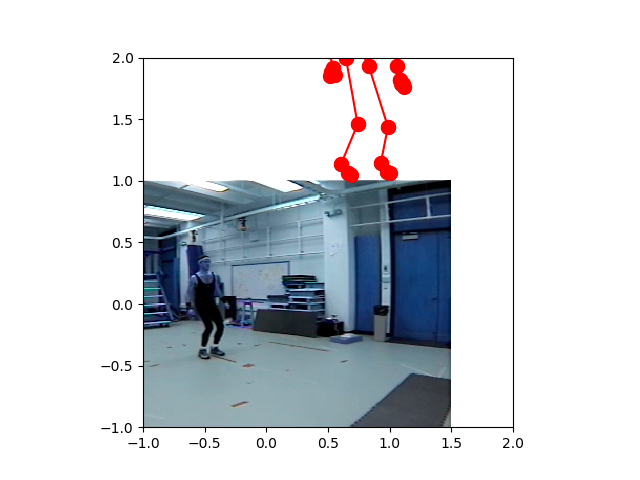

In [81]:
fx = 1
fy = 1
cx = 1
cy = 1
cMatrix = np.array([[fx,0,cx,0],[0,fy,cy,0],[0,0,1,0]])

rvec = (np.array([0,-50,0],np.float))
rMat = eulerAnglesToRotationMatrix(rvec)
tvec = (np.array([-15,0,2],np.float))
wMat=np.c_[rMat,tvec]


projX = []
projY = []


for i in range(MCapVal.iloc[550,:].shape[0]):
    a=MCapVal.iloc[500,i]
    a=np.append(a,[1.])
    
    b=np.linalg.multi_dot([cMatrix[:,:-1],wMat,a])

    projX.append(b[0]/b[2])
    projY.append(b[1]/b[2])

for i in range(len(parent)):
    x = [projX[parent[i]], projX[child[i]]] 
    y = [projY[parent[i]], projY[child[i]]]
    
    plt.scatter(x,y,c='r', s=100)
    plt.plot(x,y, c='r')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
plt.ylim([-1,2])
plt.xlim([-1,2])
plt.imshow(image, extent=[-1.5,1.5,-1,1])
plt.show()
# print(a,projX,projY)

# np.append(rMat,np.transpose(tvec),axis=1)

Next steps:
Lock axis on picture, to better see changes
3D points numpy arrays.
Add point to make 4x1 matrix
Do rotation and translation matrix to reorient 3d point (extrinsic matrix)
project to 2d space using camera distance and angles (intrinsic matrix)
fx, fy is 2d scaling
cx, cy is 2d translation (where is camera)
Can use opencv

In [114]:
cMatrix = np.array([[fx,0,cx,0],[0,fy,cy,0],[0,0,1,0]])


MCapVal.iloc[500,0]


array([[ 8.60933],
       [16.2498 ],
       [10.264  ]])

-0.5411826181347869 -1.031606540717816


-0.5411826181347869 -1.031606540717816
